# Modeling and Evaluation 

## Logistic Regression model 

In [1]:
#load libraries and datasets 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# to bypass warnings in the jupyter notebook
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=PendingDeprecationWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
X_train = pickle.load(open('pickle_files/X_train.pkl','rb'))
y_train = pickle.load(open('pickle_files/y_train.pkl','rb'))
X_test = pickle.load(open('pickle_files/X_test.pkl','rb'))
y_test = pickle.load(open('pickle_files/y_test.pkl','rb'))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred,y_test)))

Accuracy 82.88043478260869 %


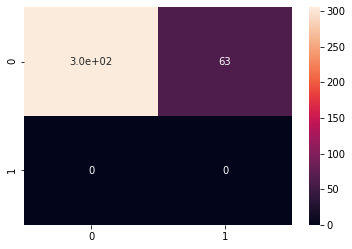

In [5]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       305
           1       0.00      0.00      0.00        63

    accuracy                           0.83       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.69      0.83      0.75       368



#### Using SMOTE to oversample minority class by synthetically generaying additional sample to improve the model performance

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values.ravel())

model = LogisticRegression()
model_res = model.fit(X_train_res, y_train_res)

y_pred = model_res.predict(X_test)

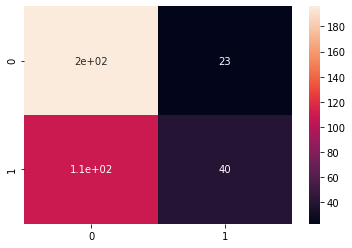

In [8]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75       305
           1       0.27      0.63      0.38        63

    accuracy                           0.64       368
   macro avg       0.58      0.64      0.56       368
weighted avg       0.79      0.64      0.68       368



In [10]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [11]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8457493857493856


In [12]:
model1=LogisticRegression(C=100,penalty="l2")
model1.fit(X_train,y_train)
print("score",model1.score(X_test,y_test))

score 0.8288043478260869


In [13]:
y_pred = model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       305
           1       0.00      0.00      0.00        63

    accuracy                           0.83       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.69      0.83      0.75       368



In [14]:
#exporting the model as pikle file

import pickle 

pickle.dump(model1, open('pickle_files/model_lr.pkl', 'wb'))

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

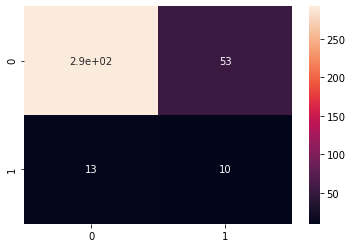

In [16]:
# Testing Set Performance
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True);

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       305
           1       0.43      0.16      0.23        63

    accuracy                           0.82       368
   macro avg       0.64      0.56      0.57       368
weighted avg       0.78      0.82      0.78       368



In [18]:
X_train.shape

(1102, 10)

In [19]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(10,29,2))}
]

# Create grid search object

model = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

model2 = model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [20]:
model2.best_estimator_.get_params()['classifier']

RandomForestClassifier(max_features=10, n_estimators=70)

In [21]:
print('Model accuracy is',model2.score(X_test, y_test))

Model accuracy is 0.8097826086956522


In [22]:
y_pred_2 = model2.predict(X_test)

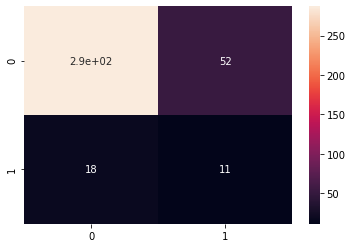

In [23]:
# Testing Set Performance
cm = confusion_matrix(y_pred_2, y_test)
sns.heatmap(cm, annot=True);

In [24]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       305
           1       0.38      0.17      0.24        63

    accuracy                           0.81       368
   macro avg       0.61      0.56      0.57       368
weighted avg       0.77      0.81      0.78       368



In [25]:
pickle.dump(model2, open('pickle_files/model_rf.pkl','wb'))

## Deep Learning model

In [26]:
import tensorflow as tf 

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 29, activation = 'relu', input_shape = (10,)))
model.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                319       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 144       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10        
Total params: 1,388
Trainable params: 1,388
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000, batch_size = 50)

Epoch 1/1000
23/23 [==============================] - 0s 856us/step - loss: 73.6830 - accuracy: 0.8179
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 7.6121 - accuracy: 0.7341
Epoch 3/1000
23/23 [==============================] - 0s 992us/step - loss: 7.0896 - accuracy: 0.8218
Epoch 4/1000
23/23 [==============================] - 0s 975us/step - loss: 9.0959 - accuracy: 0.8070
Epoch 5/1000
23/23 [==============================] - 0s 901us/step - loss: 4.7228 - accuracy: 0.7610
Epoch 6/1000
23/23 [==============================] - 0s 845us/step - loss: 2.8973 - accuracy: 0.7472
Epoch 7/1000
23/23 [==============================] - 0s 860us/step - loss: 2.0925 - accuracy: 0.7785
Epoch 8/1000
23/23 [==============================] - 0s 869us/step - loss: 1.9164 - accuracy: 0.7635
Epoch 9/1000
23/23 [==============================] - 0s 972us/step - loss: 3.9789 - accuracy: 0.8208
Epoch 10/1000
23/23 [==============================] - 0s 973us/step - loss: 1.9063

23/23 [==============================] - 0s 814us/step - loss: 1.1885 - accuracy: 0.7347
Epoch 81/1000
23/23 [==============================] - 0s 794us/step - loss: 2.5145 - accuracy: 0.7736
Epoch 82/1000
23/23 [==============================] - 0s 896us/step - loss: 1.1749 - accuracy: 0.7607
Epoch 83/1000
23/23 [==============================] - 0s 760us/step - loss: 1.7189 - accuracy: 0.7746
Epoch 84/1000
23/23 [==============================] - 0s 806us/step - loss: 9.9504 - accuracy: 0.6197
Epoch 85/1000
23/23 [==============================] - 0s 782us/step - loss: 3.4272 - accuracy: 0.6280
Epoch 86/1000
23/23 [==============================] - 0s 781us/step - loss: 1.1564 - accuracy: 0.7868
Epoch 87/1000
23/23 [==============================] - 0s 765us/step - loss: 1.6755 - accuracy: 0.7248
Epoch 88/1000
23/23 [==============================] - 0s 792us/step - loss: 1.4692 - accuracy: 0.7306
Epoch 89/1000
23/23 [==============================] - 0s 805us/step - loss: 1.9053 - a

23/23 [==============================] - 0s 904us/step - loss: 1.2186 - accuracy: 0.8100
Epoch 160/1000
23/23 [==============================] - 0s 812us/step - loss: 6.8788 - accuracy: 0.5658
Epoch 161/1000
23/23 [==============================] - 0s 829us/step - loss: 2.2611 - accuracy: 0.7590
Epoch 162/1000
23/23 [==============================] - 0s 780us/step - loss: 0.5215 - accuracy: 0.7765
Epoch 163/1000
23/23 [==============================] - 0s 775us/step - loss: 0.5202 - accuracy: 0.8104
Epoch 164/1000
23/23 [==============================] - 0s 772us/step - loss: 0.5058 - accuracy: 0.8141
Epoch 165/1000
23/23 [==============================] - 0s 771us/step - loss: 0.5784 - accuracy: 0.8183
Epoch 166/1000
23/23 [==============================] - 0s 773us/step - loss: 1.3220 - accuracy: 0.8030
Epoch 167/1000
23/23 [==============================] - 0s 773us/step - loss: 0.7822 - accuracy: 0.7544
Epoch 168/1000
23/23 [==============================] - 0s 784us/step - loss: 0

23/23 [==============================] - 0s 832us/step - loss: 1.4028 - accuracy: 0.6892
Epoch 238/1000
23/23 [==============================] - 0s 824us/step - loss: 0.6696 - accuracy: 0.7949
Epoch 239/1000
23/23 [==============================] - 0s 860us/step - loss: 0.4818 - accuracy: 0.8244
Epoch 240/1000
23/23 [==============================] - 0s 793us/step - loss: 0.4433 - accuracy: 0.8389
Epoch 241/1000
23/23 [==============================] - 0s 745us/step - loss: 0.7331 - accuracy: 0.8020
Epoch 242/1000
23/23 [==============================] - 0s 742us/step - loss: 0.8035 - accuracy: 0.8129
Epoch 243/1000
23/23 [==============================] - 0s 832us/step - loss: 0.6952 - accuracy: 0.7898
Epoch 244/1000
23/23 [==============================] - 0s 783us/step - loss: 0.6349 - accuracy: 0.8265
Epoch 245/1000
23/23 [==============================] - 0s 764us/step - loss: 2.8284 - accuracy: 0.6088
Epoch 246/1000
23/23 [==============================] - 0s 775us/step - loss: 1

23/23 [==============================] - 0s 762us/step - loss: 0.5361 - accuracy: 0.8055
Epoch 316/1000
23/23 [==============================] - 0s 762us/step - loss: 1.0914 - accuracy: 0.8154
Epoch 317/1000
23/23 [==============================] - 0s 836us/step - loss: 0.6412 - accuracy: 0.7876
Epoch 318/1000
23/23 [==============================] - 0s 781us/step - loss: 0.4787 - accuracy: 0.8567
Epoch 319/1000
23/23 [==============================] - 0s 762us/step - loss: 0.4429 - accuracy: 0.8391
Epoch 320/1000
23/23 [==============================] - 0s 754us/step - loss: 0.4511 - accuracy: 0.8413
Epoch 321/1000
23/23 [==============================] - 0s 750us/step - loss: 0.5489 - accuracy: 0.7954
Epoch 322/1000
23/23 [==============================] - 0s 867us/step - loss: 1.0013 - accuracy: 0.8308
Epoch 323/1000
23/23 [==============================] - 0s 1ms/step - loss: 1.1716 - accuracy: 0.8065
Epoch 324/1000
23/23 [==============================] - 0s 926us/step - loss: 0.9

Epoch 394/1000
23/23 [==============================] - 0s 644us/step - loss: 0.7087 - accuracy: 0.7752
Epoch 395/1000
23/23 [==============================] - 0s 715us/step - loss: 0.5662 - accuracy: 0.8419
Epoch 396/1000
23/23 [==============================] - 0s 822us/step - loss: 0.4299 - accuracy: 0.8507
Epoch 397/1000
23/23 [==============================] - 0s 695us/step - loss: 0.4223 - accuracy: 0.8548
Epoch 398/1000
23/23 [==============================] - 0s 739us/step - loss: 0.4850 - accuracy: 0.8407
Epoch 399/1000
23/23 [==============================] - 0s 781us/step - loss: 0.9658 - accuracy: 0.7144
Epoch 400/1000
23/23 [==============================] - 0s 796us/step - loss: 0.5649 - accuracy: 0.8004
Epoch 401/1000
23/23 [==============================] - 0s 746us/step - loss: 0.6724 - accuracy: 0.8177
Epoch 402/1000
23/23 [==============================] - 0s 714us/step - loss: 0.5325 - accuracy: 0.8139
Epoch 403/1000
23/23 [==============================] - 0s 728us

23/23 [==============================] - 0s 817us/step - loss: 0.4928 - accuracy: 0.8413
Epoch 473/1000
23/23 [==============================] - 0s 810us/step - loss: 0.4401 - accuracy: 0.8391
Epoch 474/1000
23/23 [==============================] - 0s 804us/step - loss: 0.4007 - accuracy: 0.8481
Epoch 475/1000
23/23 [==============================] - 0s 770us/step - loss: 0.4657 - accuracy: 0.8344
Epoch 476/1000
23/23 [==============================] - 0s 794us/step - loss: 0.4959 - accuracy: 0.8162
Epoch 477/1000
23/23 [==============================] - 0s 788us/step - loss: 0.5735 - accuracy: 0.8393
Epoch 478/1000
23/23 [==============================] - 0s 767us/step - loss: 0.4107 - accuracy: 0.8592
Epoch 479/1000
23/23 [==============================] - 0s 736us/step - loss: 0.4240 - accuracy: 0.8382
Epoch 480/1000
23/23 [==============================] - 0s 801us/step - loss: 1.6599 - accuracy: 0.6059
Epoch 481/1000
23/23 [==============================] - 0s 788us/step - loss: 0

23/23 [==============================] - 0s 823us/step - loss: 0.4018 - accuracy: 0.8612
Epoch 551/1000
23/23 [==============================] - 0s 792us/step - loss: 0.4084 - accuracy: 0.8502
Epoch 552/1000
23/23 [==============================] - 0s 832us/step - loss: 0.4272 - accuracy: 0.8486
Epoch 553/1000
23/23 [==============================] - 0s 779us/step - loss: 0.4046 - accuracy: 0.8531
Epoch 554/1000
23/23 [==============================] - 0s 789us/step - loss: 1.0994 - accuracy: 0.6215
Epoch 555/1000
23/23 [==============================] - 0s 764us/step - loss: 0.5368 - accuracy: 0.7992
Epoch 556/1000
23/23 [==============================] - 0s 788us/step - loss: 0.4391 - accuracy: 0.8540
Epoch 557/1000
23/23 [==============================] - 0s 768us/step - loss: 0.4226 - accuracy: 0.8360
Epoch 558/1000
23/23 [==============================] - 0s 865us/step - loss: 0.4039 - accuracy: 0.8504
Epoch 559/1000
23/23 [==============================] - 0s 788us/step - loss: 0

23/23 [==============================] - 0s 770us/step - loss: 0.4356 - accuracy: 0.8272
Epoch 629/1000
23/23 [==============================] - 0s 758us/step - loss: 0.4148 - accuracy: 0.8402
Epoch 630/1000
23/23 [==============================] - 0s 734us/step - loss: 0.3984 - accuracy: 0.8549
Epoch 631/1000
23/23 [==============================] - 0s 791us/step - loss: 0.4208 - accuracy: 0.8369
Epoch 632/1000
23/23 [==============================] - 0s 760us/step - loss: 0.3846 - accuracy: 0.8585
Epoch 633/1000
23/23 [==============================] - 0s 755us/step - loss: 0.4249 - accuracy: 0.8407
Epoch 634/1000
23/23 [==============================] - 0s 778us/step - loss: 0.3928 - accuracy: 0.8512
Epoch 635/1000
23/23 [==============================] - 0s 730us/step - loss: 0.4111 - accuracy: 0.8359
Epoch 636/1000
23/23 [==============================] - 0s 714us/step - loss: 0.4236 - accuracy: 0.8444
Epoch 637/1000
23/23 [==============================] - 0s 755us/step - loss: 0

Epoch 707/1000
23/23 [==============================] - 0s 757us/step - loss: 0.3994 - accuracy: 0.8482
Epoch 708/1000
23/23 [==============================] - 0s 760us/step - loss: 0.4071 - accuracy: 0.8497
Epoch 709/1000
23/23 [==============================] - 0s 764us/step - loss: 0.4134 - accuracy: 0.8413
Epoch 710/1000
23/23 [==============================] - 0s 777us/step - loss: 0.3929 - accuracy: 0.8496
Epoch 711/1000
23/23 [==============================] - 0s 726us/step - loss: 0.4107 - accuracy: 0.8426
Epoch 712/1000
23/23 [==============================] - 0s 740us/step - loss: 0.4136 - accuracy: 0.8377
Epoch 713/1000
23/23 [==============================] - 0s 765us/step - loss: 0.4165 - accuracy: 0.8552
Epoch 714/1000
23/23 [==============================] - 0s 766us/step - loss: 0.4325 - accuracy: 0.8453
Epoch 715/1000
23/23 [==============================] - 0s 794us/step - loss: 0.4479 - accuracy: 0.8302
Epoch 716/1000
23/23 [==============================] - 0s 764us

23/23 [==============================] - 0s 769us/step - loss: 0.4634 - accuracy: 0.8300
Epoch 786/1000
23/23 [==============================] - 0s 801us/step - loss: 0.4573 - accuracy: 0.8292
Epoch 787/1000
23/23 [==============================] - 0s 827us/step - loss: 0.4405 - accuracy: 0.8306
Epoch 788/1000
23/23 [==============================] - 0s 728us/step - loss: 0.4742 - accuracy: 0.8238
Epoch 789/1000
23/23 [==============================] - 0s 778us/step - loss: 0.4115 - accuracy: 0.8405
Epoch 790/1000
23/23 [==============================] - 0s 764us/step - loss: 0.4311 - accuracy: 0.8482
Epoch 791/1000
23/23 [==============================] - 0s 750us/step - loss: 0.4127 - accuracy: 0.8456
Epoch 792/1000
23/23 [==============================] - 0s 761us/step - loss: 0.4070 - accuracy: 0.8477
Epoch 793/1000
23/23 [==============================] - 0s 744us/step - loss: 0.4067 - accuracy: 0.8513
Epoch 794/1000
23/23 [==============================] - 0s 723us/step - loss: 0

23/23 [==============================] - 0s 788us/step - loss: 0.4304 - accuracy: 0.8540
Epoch 864/1000
23/23 [==============================] - 0s 777us/step - loss: 0.4206 - accuracy: 0.8409
Epoch 865/1000
23/23 [==============================] - 0s 791us/step - loss: 0.4112 - accuracy: 0.8431
Epoch 866/1000
23/23 [==============================] - 0s 771us/step - loss: 0.4127 - accuracy: 0.8483
Epoch 867/1000
23/23 [==============================] - 0s 717us/step - loss: 0.3982 - accuracy: 0.8602
Epoch 868/1000
23/23 [==============================] - 0s 727us/step - loss: 0.4021 - accuracy: 0.8479
Epoch 869/1000
23/23 [==============================] - 0s 749us/step - loss: 0.4335 - accuracy: 0.8421
Epoch 870/1000
23/23 [==============================] - 0s 759us/step - loss: 0.4025 - accuracy: 0.8598
Epoch 871/1000
23/23 [==============================] - 0s 765us/step - loss: 0.4057 - accuracy: 0.8503
Epoch 872/1000
23/23 [==============================] - 0s 762us/step - loss: 0

23/23 [==============================] - 0s 761us/step - loss: 0.4523 - accuracy: 0.8327
Epoch 942/1000
23/23 [==============================] - 0s 776us/step - loss: 0.4288 - accuracy: 0.8465
Epoch 943/1000
23/23 [==============================] - 0s 960us/step - loss: 0.4672 - accuracy: 0.8237
Epoch 944/1000
23/23 [==============================] - 0s 787us/step - loss: 0.4279 - accuracy: 0.8470
Epoch 945/1000
23/23 [==============================] - 0s 710us/step - loss: 0.4228 - accuracy: 0.8500
Epoch 946/1000
23/23 [==============================] - 0s 748us/step - loss: 0.4446 - accuracy: 0.8370
Epoch 947/1000
23/23 [==============================] - 0s 755us/step - loss: 0.4565 - accuracy: 0.8296
Epoch 948/1000
23/23 [==============================] - 0s 770us/step - loss: 0.4544 - accuracy: 0.8309
Epoch 949/1000
23/23 [==============================] - 0s 773us/step - loss: 0.4141 - accuracy: 0.8555
Epoch 950/1000
23/23 [==============================] - 0s 761us/step - loss: 0

In [30]:
y_pred_3 = model.predict(X_test)
y_pred_3 = (y_pred_3 > 0.5)

In [31]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

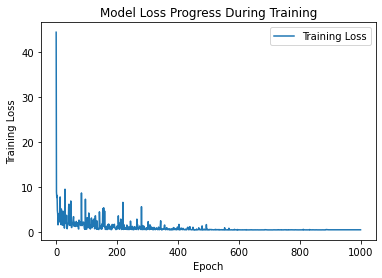

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

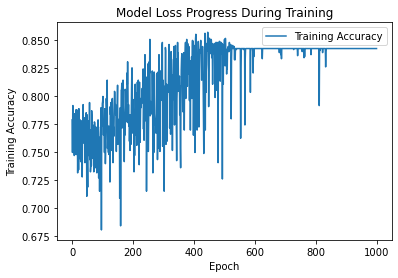

In [33]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy']);

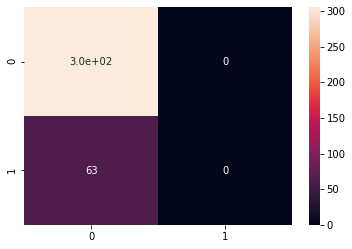

In [34]:
# Testing Set Performance
cm = confusion_matrix(y_test,y_pred_3)
sns.heatmap(cm, annot = True);

In [35]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       305
           1       0.00      0.00      0.00        63

    accuracy                           0.83       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.69      0.83      0.75       368



In [36]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("pickle_files/model")

# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("pickle_files/model")

INFO:tensorflow:Assets written to: pickle_files/model/assets


#### The Random Forest model gas performed the best. 